In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import MinMaxScaler
import pylab

In [2]:
source_df = pd.read_csv('../csvs/students_knowledge.csv')
source_df = source_df.loc[:, ~source_df.columns.str.contains('^Unnamed')]
source_df = source_df.drop('Attribute Information:', axis=1)
source_df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df = source_df.drop(' UNS', axis=1)
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
x = df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08080808, 0.08888889, 0.10526316, 0.24242424, 0.96774194],
       [0.06060606, 0.06666667, 0.05263158, 0.25252525, 0.35483871],
       [0.1010101 , 0.11111111, 0.15789474, 0.65656566, 0.32258065],
       [0.08080808, 0.08888889, 0.08421053, 0.98989899, 0.25806452]])

In [5]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  


In [6]:
Z = hierarchy.linkage(D, 'complete')
max_clust = 4
clusters = fcluster(Z, max_clust, criterion='maxclust')
clusters[:]

array([3, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 2, 2, 4, 1, 1, 3, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 4, 1, 2, 2, 1, 1, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 4, 1, 2, 2, 1, 4, 4, 4, 4, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 4, 1, 2, 2, 4, 1, 2, 4, 4, 4, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 4, 2, 1, 1, 2, 4, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 4, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 4,
       2, 2, 2, 4, 4, 1, 4, 2, 4, 1, 2, 4, 4, 4, 2, 4], dtype=int32)

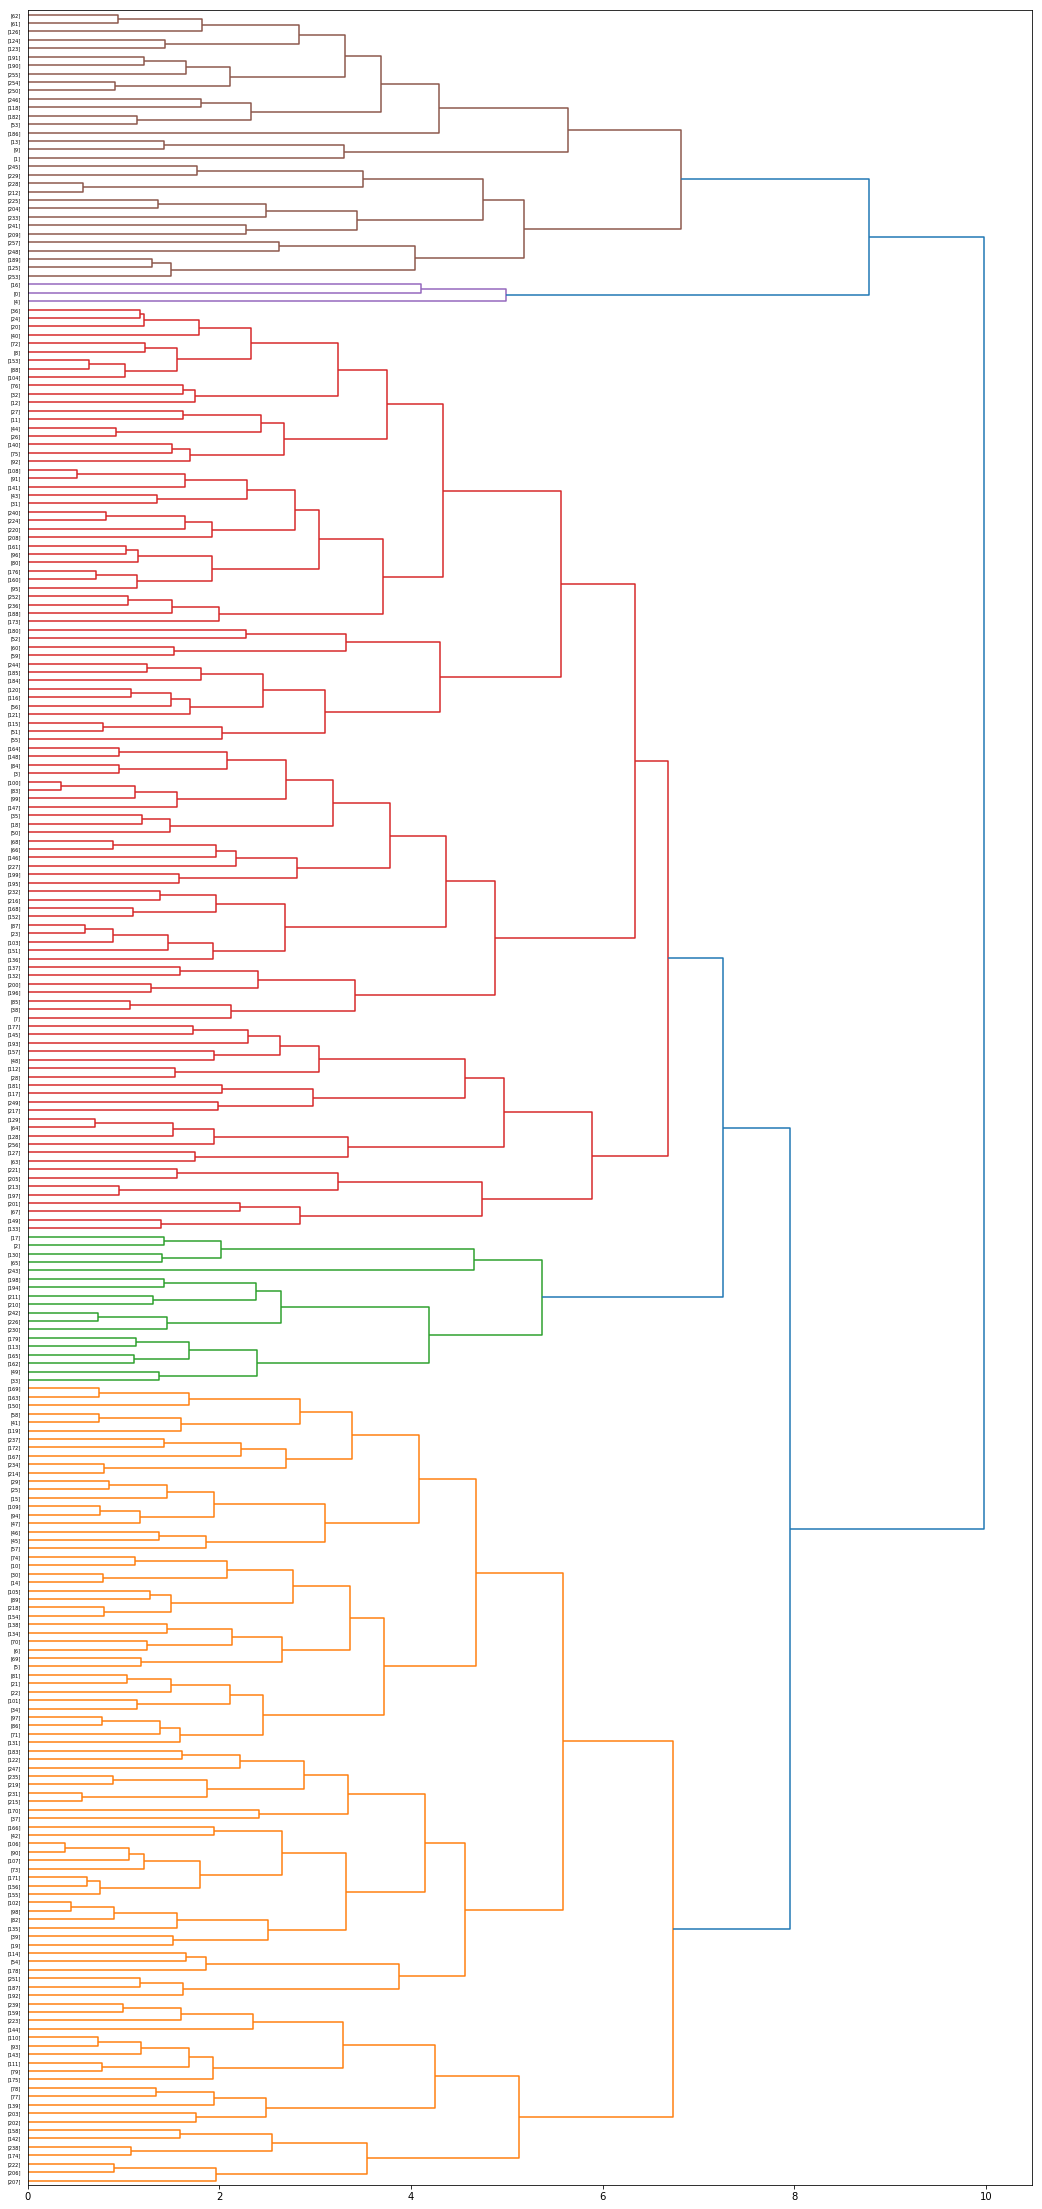

In [7]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')